# New Section

In [ ]:
# First would be to install lightweight_mmm
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git
!pip uninstall -y matplotlib
!pip install matplotlib==3.1.3

  Cloning https://github.com/google/lightweight_mmm.git to /tmp/pip-req-build-2k7o8d3k
  Running command git clone --filter=blob:none --quiet https://github.com/google/lightweight_mmm.git /tmp/pip-req-build-2k7o8d3k
  Resolved https://github.com/google/lightweight_mmm.git to commit 4406aaa77bddc5b0d73d31c6cf4f2ace03f3ffda
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 26.5 MB/s eta 0:00:00
  Created wheel for lightweight-mmm: filename=lightweight_mmm-0.1.9-py3-none-any.whl size=105532 sha256=5130b0f075bb7701d6fc4033bbb2a521a27ba7d62e30baec8c9c4bcbadf5548c
  Stored in directory: /tmp/pip-ephem-wheel-cache-w0q2bo6w/wheels/24/39/b1/2a08aa08bb7f10163332e54a87e860efd8f74fe42f4b93f9e2
Successfully built lightweight-mmm
  Attempting uninstall: matplotlib
    Found existing inst

Found existing installation: matplotlib 3.6.1
Uninstalling matplotlib-3.6.1:
  Successfully uninstalled matplotlib-3.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [1]:
# Import jax.numpy and any other library we might need.
import jax.numpy as jnp
import numpyro
import pandas as pd


In [3]:
# Import the relevant modules of the library
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

In [2]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3.tar.gz (40.9 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=11757618 sha256=80709554422eb31ee378de5e2e383a55f06d13215f1e2b220cea3448d5b9d205
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
bigframes 1.9.0 requires matplotlib>=3.7.1, but you have matplotlib 3.1.3 which is incompatible.
lightweight-mmm 0.1.9 requires matplotlib==3.6.1, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.9.3 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.

In [4]:
csv="/content/bike_sales_data.csv"
df=pd.read_csv(csv) #, index_col=0)
df

,Week,sales,branded_search_spend,nonbranded_search_spend,facebook_spend,print_spend,ooh_spend,tv_spend,radio_spend
0,7/23/17,58850.0000,1528.80,463.3200,802.6200,0,0,0,0
1,7/30/17,62050.0000,1575.60,468.0000,819.3120,0,0,0,0
2,8/6/17,59388.0000,1544.40,477.3600,749.0340,0,0,0,0
3,8/13/17,56964.0000,1528.80,468.0000,741.4680,0,0,0,0
4,8/20/17,53460.0000,1560.00,458.6400,811.2000,0,0,0,0
...,...,...,...,...,...,...,...,...,...
255,6/12/22,98173.4880,3466.32,814.9285,1715.8284,1000,0,2500,0
256,6/19/22,104221.7248,3534.96,829.0855,1802.8296,0,0,2500,0
257,6/26/22,103283.6800,3363.36,793.6930,1631.2296,0,0,2500,0
258,7/3/22,105279.5200,3534.96,829.0855,1855.8540,0,0,2500,0


In [5]:
from datetime import datetime
df['Week'] = pd.to_datetime(df['Week'])

<ipython-input-5-d95c1cbb3362>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Week'] = pd.to_datetime(df['Week'])


In [6]:
#General EDA before we hop into modeling, is the correlation of the variables with the target variable, sales.
# We find that the branded_search_spend, nonbranded_search_spend and facebook have good correlation with the target variable.
#So, we can hypothesize that the model will generate coeffecients such that the vol from these media variables will be high
df.corr()


,Week,sales,branded_search_spend,nonbranded_search_spend,facebook_spend,print_spend,ooh_spend,tv_spend,radio_spend
Week,1.000000,0.600665,0.376041,0.571020,0.375027,-0.006477,0.004914,0.167913,0.031285
sales,0.600665,1.000000,0.588992,0.666117,0.587216,-0.228140,-0.235758,0.393860,0.198385
branded_search_spend,0.376041,0.588992,1.000000,0.575752,0.996863,-0.033153,-0.003820,0.210736,-0.085149
nonbranded_search_spend,0.571020,0.666117,0.575752,1.000000,0.572706,0.070232,0.090937,0.298332,-0.113197
facebook_spend,0.375027,0.587216,0.996863,0.572706,1.000000,-0.034438,-0.003719,0.214261,-0.087027
print_spend,-0.006477,-0.228140,-0.033153,0.070232,-0.034438,1.000000,0.516008,0.014293,-0.105410
ooh_spend,0.004914,-0.235758,-0.003820,0.090937,-0.003719,0.516008,1.000000,-0.170746,-0.244274
tv_spend,0.167913,0.393860,0.210736,0.298332,0.214261,0.014293,-0.170746,1.000000,-0.179603
radio_spend,0.031285,0.198385,-0.085149,-0.113197,-0.087027,-0.105410,-0.244274,-0.179603,1.000000


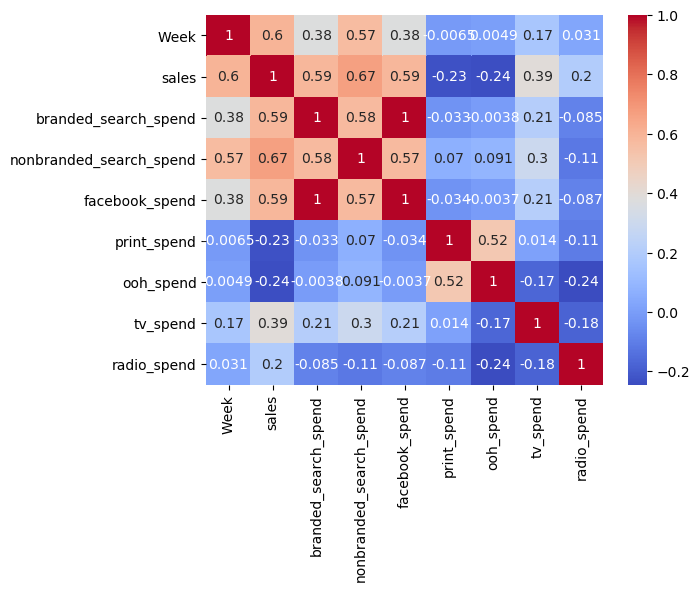

In [7]:
#Generating a heatmap to better visualzie the correlation.

import matplotlib.pyplot as mp
import seaborn as sp

dataplot = sp.heatmap(df.corr(), cmap = 'coolwarm', annot = True)


In [8]:
#Finding out the spend contributions, so we know that which media variable is important in the model, and must be included.

Total_Sum = df[['branded_search_spend','nonbranded_search_spend','facebook_spend','print_spend','ooh_spend','tv_spend','radio_spend']].sum()

VolContri = (Total_Sum/Total_Sum.sum())*100

VolContri

branded_search_spend       42.204493
nonbranded_search_spend     8.350576
facebook_spend             21.069513
print_spend                 7.822197
ooh_spend                   3.911098
tv_spend                    5.786829
radio_spend                10.855294
dtype: float64

In [9]:
# Clearly, branded search spends, non branded search spends and radios spends will

array([1494711,  295743,  746196,  277030,  138515,  204945,  384450])

In [81]:
media_data = df[['branded_search_spend', 'nonbranded_search_spend','facebook_spend', 'print_spend', 'ooh_spend','tv_spend', 'radio_spend']].to_numpy()
target = df[['sales']].to_numpy()
costs = df[['branded_search_spend', 'nonbranded_search_spend','facebook_spend', 'print_spend', 'ooh_spend','tv_spend', 'radio_spend']].sum().to_numpy()


In [82]:
data_size = media_data.shape[0]




In [83]:
# Split and scale data.
split_point = data_size - 30
#Splitting the media data into train and test sets, so that we have 230 rows in training sample, and 30 rows in testing sample.
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
# Target
target_train = target[:split_point].reshape(-1)

In [84]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

media_data_train = media_scaler.fit_transform(media_data_train)
target_train = target_scaler.fit_transform(target_train)
costs2 = cost_scaler.fit_transform(costs)

In [85]:
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")

In [86]:
number_warmup=100
number_samples=100

In [87]:

mmm.fit(
    media=media_data_train,
    media_prior=costs2,
    target=target_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    number_chains=1,
    )

sample: 100%|██████████| 200/200 [01:31<00:00,  2.19it/s, 70 steps of size 1.78e-02. acc. prob=0.57] 


In [88]:
# Printing the results, where we mainly look at the r_hat values, and they should ideally be less than 1.1

result_df = mmm.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
ad_effect_retention_rate[0]      0.48      0.36      0.39      0.04      1.00     15.08      1.02
ad_effect_retention_rate[1]      0.42      0.26      0.40      0.07      0.85     21.23      0.99
ad_effect_retention_rate[2]      0.44      0.35      0.27      0.10      0.99      2.90      2.08
ad_effect_retention_rate[3]      0.52      0.25      0.57      0.02      0.84     14.35      1.01
ad_effect_retention_rate[4]      0.51      0.31      0.53      0.05      0.91     12.73      1.12
ad_effect_retention_rate[5]      0.30      0.27      0.16      0.02      0.75     20.12      0.99
ad_effect_retention_rate[6]      0.43      0.21      0.47      0.07      0.68     28.52      1.00
              coef_media[0]      0.13      0.10      0.12      0.00      0.27     12.68      1.04
              coef_media[1]      0.20      0.06      0.20      0.10      0.28     26.65      1.05
              coef_

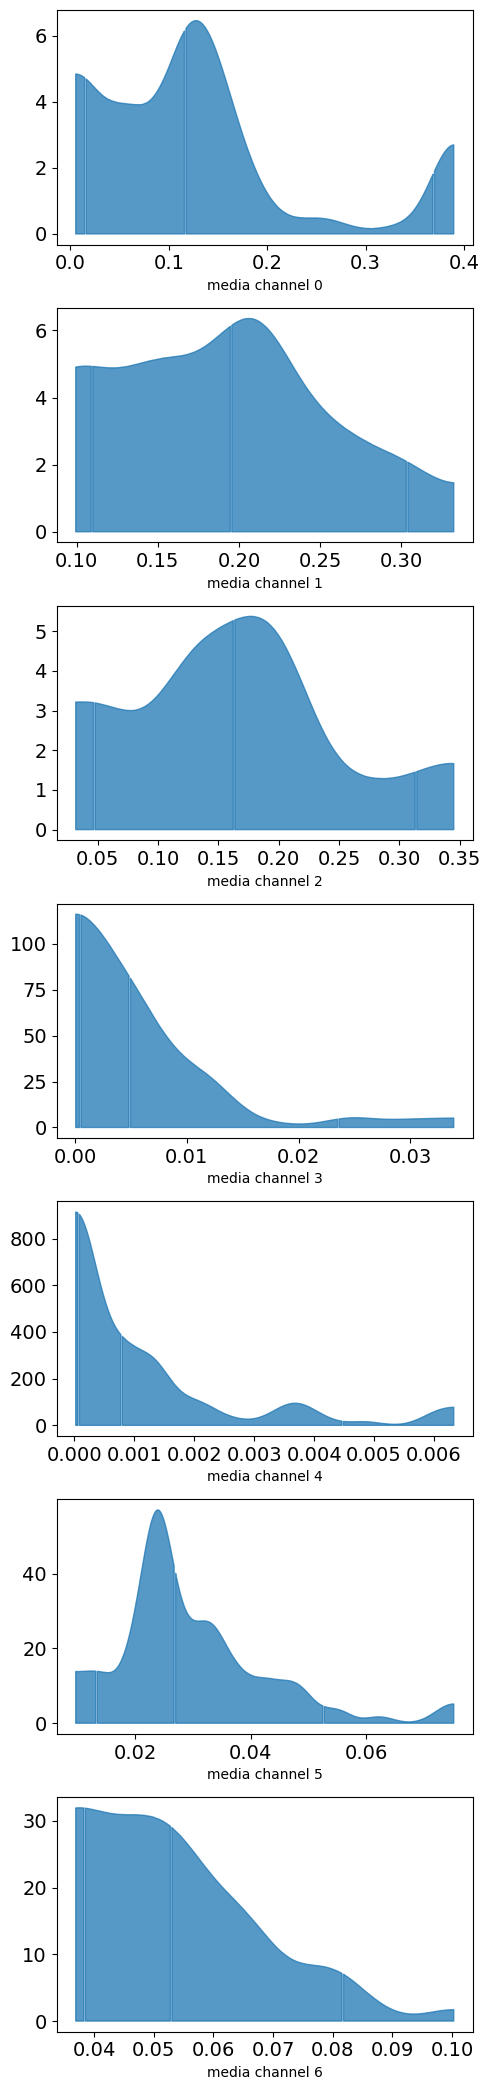

In [89]:
plot.plot_media_channel_posteriors(media_mix_model=mmm)


#These plots basically give us the confidence, that in what range does the coeffecient fall.

#For example, in media channel 0, the model gives us a coeffecient of a little more than 0.1, with the highest confidence.

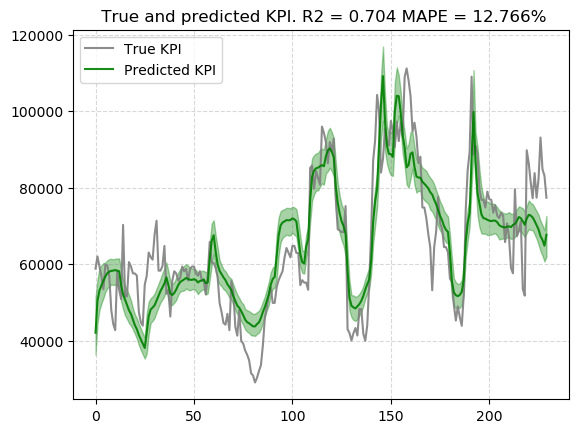

In [90]:
plot.plot_model_fit(mmm, target_scaler = target_scaler)

# The R Squared value might be on the lower side, since we do not have baseline variables, and only a limited number of media variables in the model.
# So, we can infer that only 70% of the variation in sales is actually being explained by the variables which we have included in our model.

In [91]:
# We have to scale the test media data if we have not done so before.
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test))
new_predictions


Array([[1.0866652 , 0.9880886 , 0.9403149 , ..., 1.865758  , 1.8758625 ,
        1.872932  ],
       [1.1022177 , 1.0036676 , 0.9627212 , ..., 1.9040434 , 1.918709  ,
        1.9152365 ],
       [1.0855918 , 0.980896  , 0.92913187, ..., 1.7378964 , 1.7617145 ,
        1.7374343 ],
       ...,
       [1.1500511 , 1.1004345 , 1.0460081 , ..., 1.8631663 , 1.8709615 ,
        1.8577509 ],
       [1.0303721 , 0.989735  , 0.94836617, ..., 1.8364261 , 1.8515291 ,
        1.8406906 ],
       [1.0628412 , 1.0243402 , 0.98485506, ..., 1.7993045 , 1.810205  ,
        1.8032134 ]], dtype=float32)

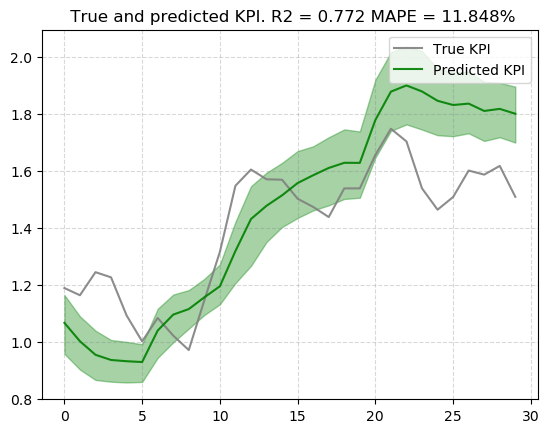

In [92]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target[split_point:].squeeze()))

In [93]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

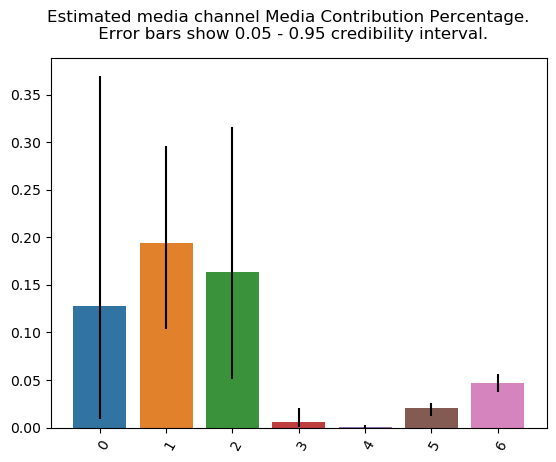

In [94]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage")

#

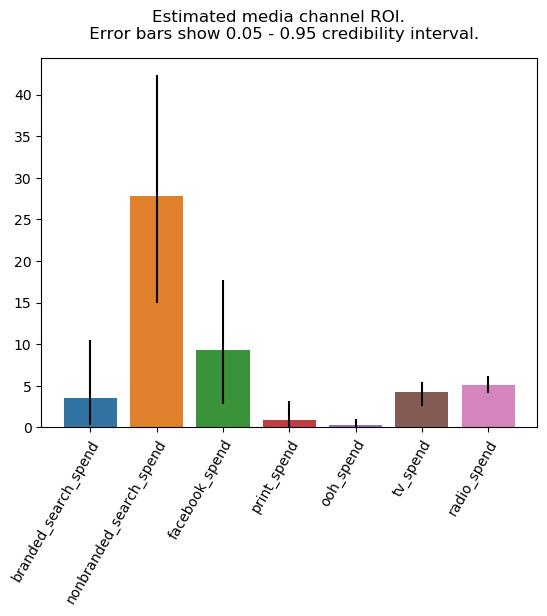

In [95]:
plot.plot_bars_media_metrics(metric= roi_hat , metric_name="ROI", channel_names = ['branded_search_spend', 'nonbranded_search_spend','facebook_spend', 'print_spend', 'ooh_spend','tv_spend', 'radio_spend'] )